In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
def gen_dist(list, n):
    return np.random.beta(list[0], list[1], size = (n,1))

def no_from_dist(list):
    return np.random.beta(list[0], list[1])

In [3]:
#find the distribution with highest 95th percentile
def UCB_decision(list):
    d = {np.percentile(gen_dist(i, 1000), 100*(1-(1/(j+10)))): i for i in list}
    return d[max(d.keys())]
    
def update_prior_UCB(list):
    best_dist = UCB_decision(list)[2]
    incr = (np.random.uniform(0,1,1) < eval('ad_' + best_dist + '_CTR'))
    eval('ad_' + best_dist + '_post_dist_UCB')[0] += incr
    eval('ad_' + best_dist + '_post_dist_UCB')[1] +=  (1-incr)
    return(eval('ad_' + best_dist + '_CTR'))
    
#find the distribution with highest random draw from from it
def Thompson_decision(a):
    d = {float(no_from_dist(i[:2])) : i[2] for i in a}
    
    return d[max(d.keys())]

def update_prior_Thompson(b):
    best_dist = Thompson_decision(b)
    incr = (np.random.uniform(0,1,1) < eval('ad_' + best_dist + '_CTR'))
    eval('ad_' + best_dist + '_post_dist_Thompson')[0] += incr
    eval('ad_' + best_dist + '_post_dist_Thompson')[1] +=  (1-incr)
    return(eval('ad_' + best_dist + '_CTR'))

#find the distribution with highest mean percentile
def Eps_decision(a):
    d = {float((i[0]/(i[0] + i[1]))) : i[2] for i in a}
    
    return d[max(d.keys())]

def update_prior_Eps(b, epsilon):
    best_dist = Eps_decision(b)
    if (np.random.uniform(0,1,1) < epsilon * ((impressions-j)/impressions)):
        distributions = ([i[2] for i in b])
        distributions.remove(best_dist)
        rand_dist = random.choice(distributions)
        incr = (np.random.uniform(0,1,1) < eval('ad_' + rand_dist + '_CTR'))
        eval('ad_' + rand_dist + '_post_dist_Eps')[0] += incr
        eval('ad_' + rand_dist + '_post_dist_Eps')[1] +=  (1-incr)
        return(eval('ad_' + rand_dist + '_CTR'))
    else:
        incr = (np.random.uniform(0,1,1) < eval('ad_' + best_dist + '_CTR'))
        eval('ad_' + best_dist + '_post_dist_Eps')[0] += incr
        eval('ad_' + best_dist + '_post_dist_Eps')[1] +=  (1-incr)
        return(eval('ad_' + best_dist + '_CTR'))


In [9]:
#true CTRs
ad_a_CTR = 0.061
ad_b_CTR = 0.020
ad_c_CTR = 0.060

#prior distributions
ad_a_prior_par = ([80, 1000, 'a'])
ad_b_prior_par = ([90, 1000, 'b'])
ad_c_prior_par = ([120, 1000, 'c'])

#posterior distributions that will be updated
ad_a_post_dist_UCB = ([80, 1000, 'a'])
ad_b_post_dist_UCB = ([90, 1000, 'b'])
ad_c_post_dist_UCB = ([120, 1000, 'c'])

ad_a_post_dist_Thompson = ([80, 1000, 'a'])
ad_b_post_dist_Thompson = ([90, 1000, 'b'])
ad_c_post_dist_Thompson = ([120, 1000, 'c'])

ad_a_post_dist_Eps = ([80, 1000, 'a'])
ad_b_post_dist_Eps = ([90, 1000, 'b'])
ad_c_post_dist_Eps = ([120, 1000, 'c'])

In [ ]:
impressions = 500000
regr_UCB = np.zeros((impressions,1))
regr_Thompson = np.zeros((impressions,1))
regr_Eps = np.zeros((impressions,1))
for j in range(impressions):
    try:
        regr_UCB[j] = regr_UCB[j-1] + \
                        (max(ad_a_CTR, ad_b_CTR, ad_c_CTR) -
                        update_prior_UCB([ad_a_post_dist_UCB, ad_b_post_dist_UCB, ad_c_post_dist_UCB]))
    except:
        regr_UCB[j] = (max(ad_a_CTR, ad_b_CTR, ad_c_CTR) - 
                       update_prior_UCB([ad_a_post_dist_UCB, ad_b_post_dist_UCB, ad_c_post_dist_UCB]))
    try:
        regr_Thompson[j] = regr_Thompson[j-1] + \
                            (max(ad_a_CTR, ad_b_CTR, ad_c_CTR) -
                            update_prior_Thompson([ad_a_post_dist_Thompson, ad_b_post_dist_Thompson, ad_c_post_dist_Thompson]))
    except:
        regr_Thompson[j] = (max(ad_a_CTR, ad_b_CTR, ad_c_CTR) -
                            update_prior_Thompson([ad_a_post_dist_Thompson, ad_b_post_dist_Thompson, ad_c_post_dist_Thompson]))
        
    try: 
        regr_Eps[j] = regr_Eps[j-1] + \
                        (max(ad_a_CTR, ad_b_CTR, ad_c_CTR) - 
                        update_prior_Eps([ad_a_post_dist_Eps, ad_b_post_dist_Eps, ad_c_post_dist_Eps], 0.1))
    except:
        regr_Eps[j] = (max(ad_a_CTR, ad_b_CTR, ad_c_CTR) - 
                        update_prior_Eps([ad_a_post_dist_Eps, ad_b_post_dist_Eps, ad_c_post_dist_Eps], 0.1))
        
   

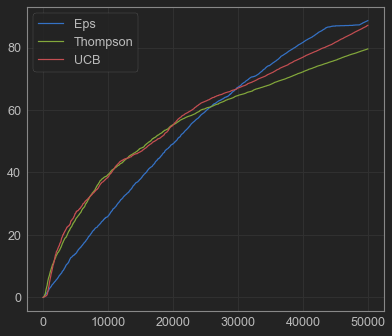

In [6]:
import jupyterthemes
from jupyterthemes import jtplot
jtplot.style(theme='monokai')

plt.plot(regr_Eps, label = 'Eps')
plt.plot(regr_Thompson, label = 'Thompson')
plt.plot(regr_UCB, label = 'UCB')
plt.legend()
plt.show()

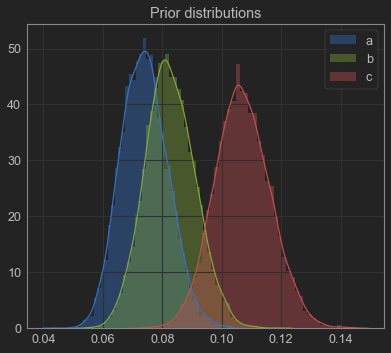

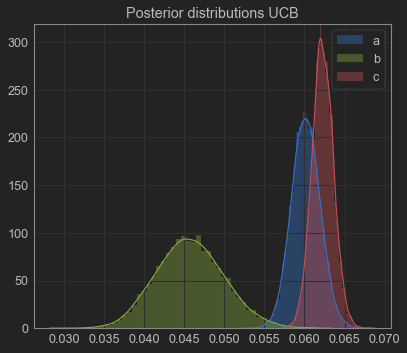

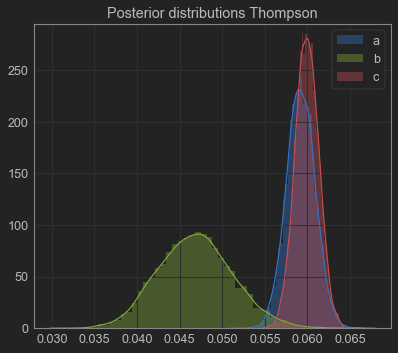

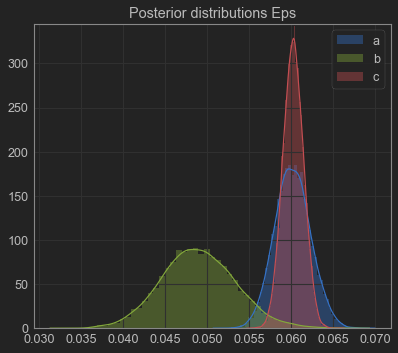

In [7]:
import jupyterthemes
from jupyterthemes import jtplot
jtplot.style(theme='monokai')

sns.distplot(np.sort(gen_dist(ad_a_prior_par, 10000)), label = 'a')
sns.distplot(np.sort(gen_dist(ad_b_prior_par, 10000)), label = 'b')
sns.distplot(np.sort(gen_dist(ad_c_prior_par, 10000)), label = 'c')
plt.legend()
plt.title('Prior distributions')
plt.show()

sns.distplot(np.sort(gen_dist(ad_a_post_dist_UCB, 10000), axis =0), label = 'a')
sns.distplot(np.sort(gen_dist(ad_b_post_dist_UCB, 10000), axis = 0), label = 'b')
sns.distplot(np.sort(gen_dist(ad_c_post_dist_UCB, 10000), axis = 0), label = 'c')
plt.legend()
plt.title('Posterior distributions UCB')
plt.show()

sns.distplot(np.sort(gen_dist(ad_a_post_dist_Thompson, 10000), axis =0), label = 'a')
sns.distplot(np.sort(gen_dist(ad_b_post_dist_Thompson, 10000), axis = 0), label = 'b')
sns.distplot(np.sort(gen_dist(ad_c_post_dist_Thompson, 10000), axis = 0), label = 'c')
plt.legend()
plt.title('Posterior distributions Thompson')
plt.show()

sns.distplot(np.sort(gen_dist(ad_a_post_dist_Eps, 10000), axis =0), label = 'a')
sns.distplot(np.sort(gen_dist(ad_b_post_dist_Eps, 10000), axis = 0), label = 'b')
sns.distplot(np.sort(gen_dist(ad_c_post_dist_Eps, 10000), axis = 0), label = 'c')
plt.legend()
plt.title('Posterior distributions Eps')
plt.show()